In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as data

In [3]:
df = pd.read_csv(r'C:\Users\Chinchore\Downloads\AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1 = df.reset_index()['close']
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

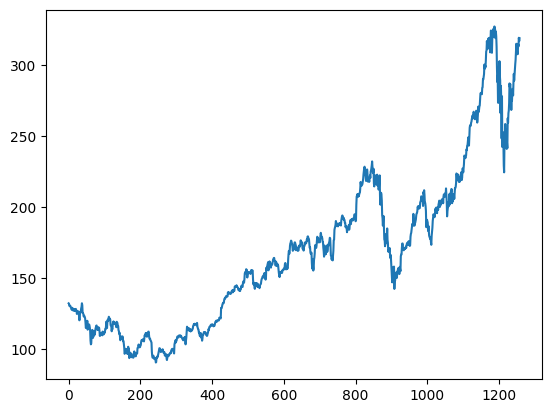

In [5]:
plt.plot(df1)

In [6]:
# LSTM are sensitive to the scale of the data, we apply MinMax scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 =scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [8]:
#splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
training_size,test_size

(817, 441)

In [10]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [11]:
import numpy as np
# convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])      
    return np.array(dataX), np.array(dataY)

In [12]:
#reshape into X=t,t+1,t+2,t+3 &t+4
time_step = 100
X_train, Y_train = create_dataset(train_data,time_step)
X_test,Y_test =create_dataset(test_data, time_step)

In [13]:
print(X_train.shape),print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [14]:
print(X_test.shape),print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [15]:
#reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
#create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\Chinchore\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0225 - val_loss: 0.0633
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0044 - val_loss: 0.0060
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 9.3333e-04 - val_loss: 0.0052
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 7.1028e-04 - val_loss: 0.0039
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 6.4082e-04 - val_loss: 0.0036
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.7503e-04 - val_loss: 0.0039
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.6826e-04 - val_loss: 0.0035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 5.2613e-04 - val_loss: 0.0037
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 5.5310e-04 - val_loss: 0.0037
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 5.9747e-04 - val_loss: 0.0039
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 5.5117e-04 - val_loss: 0.0036
Epoch 12/100
12

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.17.0'

In [41]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [42]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [43]:
### Calculate RMSE performance metrics (root mean scaler error) 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

141.4029255993427

In [44]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

237.01124338149583

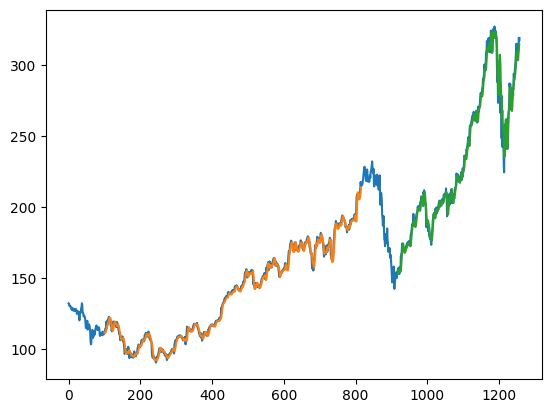

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
len(test_data)

441

In [47]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [50]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.95479625]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

1258

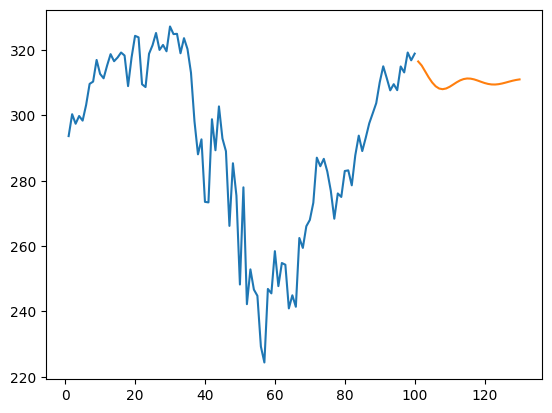

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

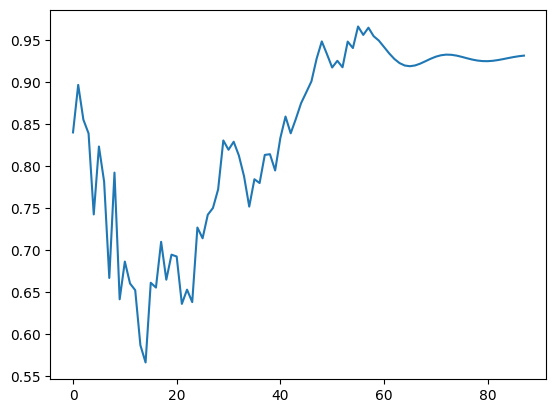

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [55]:
df3=scaler.inverse_transform(df3).tolist()
df3

[[132.045],
 [131.78],
 [130.28],
 [130.535],
 [129.96],
 [130.12],
 [129.36],
 [128.65],
 [127.8],
 [127.42],
 [128.88],
 [128.59],
 [127.17000000000002],
 [126.92],
 [127.6],
 [127.3],
 [127.88],
 [126.6],
 [127.61],
 [127.03],
 [128.11],
 [127.5],
 [126.74999999999999],
 [124.53],
 [125.425],
 [126.6],
 [126.43999999999998],
 [126.0],
 [125.69000000000001],
 [122.57],
 [120.07],
 [123.28],
 [125.65999999999998],
 [125.61],
 [126.81999999999998],
 [128.51],
 [129.62],
 [132.07],
 [130.75],
 [125.22],
 [125.15999999999998],
 [124.50000000000001],
 [122.77],
 [123.37999999999998],
 [122.98999999999998],
 [122.37],
 [121.3],
 [118.43999999999998],
 [114.64],
 [115.4],
 [115.13],
 [115.52],
 [119.72],
 [113.49],
 [115.24],
 [115.15],
 [115.96],
 [117.16],
 [116.5],
 [115.01],
 [112.65],
 [105.76],
 [103.12],
 [103.74],
 [109.69],
 [112.92],
 [113.29],
 [112.76],
 [107.72],
 [112.34],
 [110.37],
 [109.27],
 [112.31],
 [110.15],
 [112.57],
 [114.21],
 [115.31],
 [116.28],
 [116.41],
 [113.

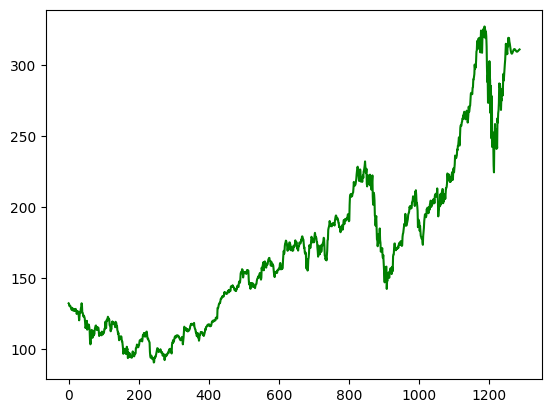

In [38]:
plt.plot(df3 ,'g')